In [51]:
import seaborn as sns
import numpy as np

In [4]:
# import datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

## Categorical Plots
Categorical Scatter Plot
- Stripplot
- Swarmplot

Categorical Distribution Plots
- Boxplot
- Violinplot

Categorical Estimate Plot -> for central tendency
- Barplot
- Pointplot
- Countplot

### Figure level function -> catplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

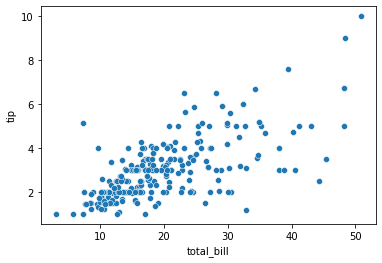

In [5]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

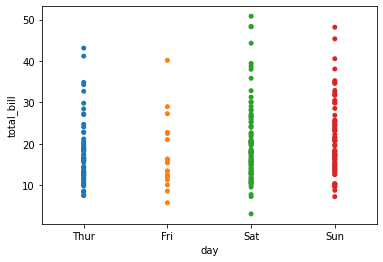

In [7]:
# strip plot
# jitter add some noise in categories
sns.stripplot(data=tips, y='total_bill', x='day',jitter=False)

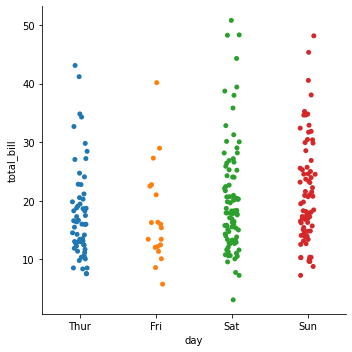

In [9]:
# figure level function
sns.catplot(data=tips, y='total_bill', x='day',jitter=True,kind='strip')

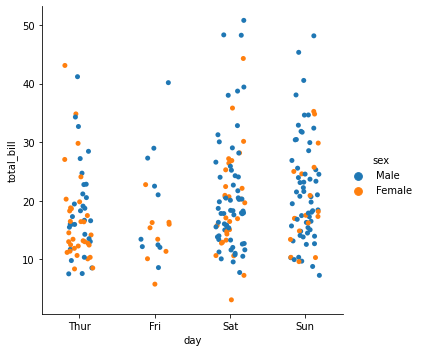

In [16]:
# jitter
sns.catplot(data=tips, y='total_bill', x='day',jitter=0.2,kind='strip',hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

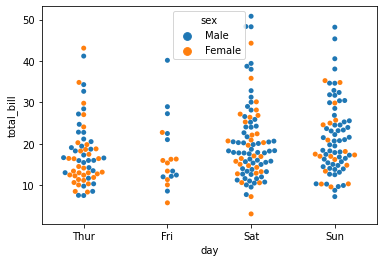

In [19]:
# swarmplot
# gives some distribution of the categories as well
sns.swarmplot(data=tips, y='total_bill', x='day',hue='sex')

## Boxplot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

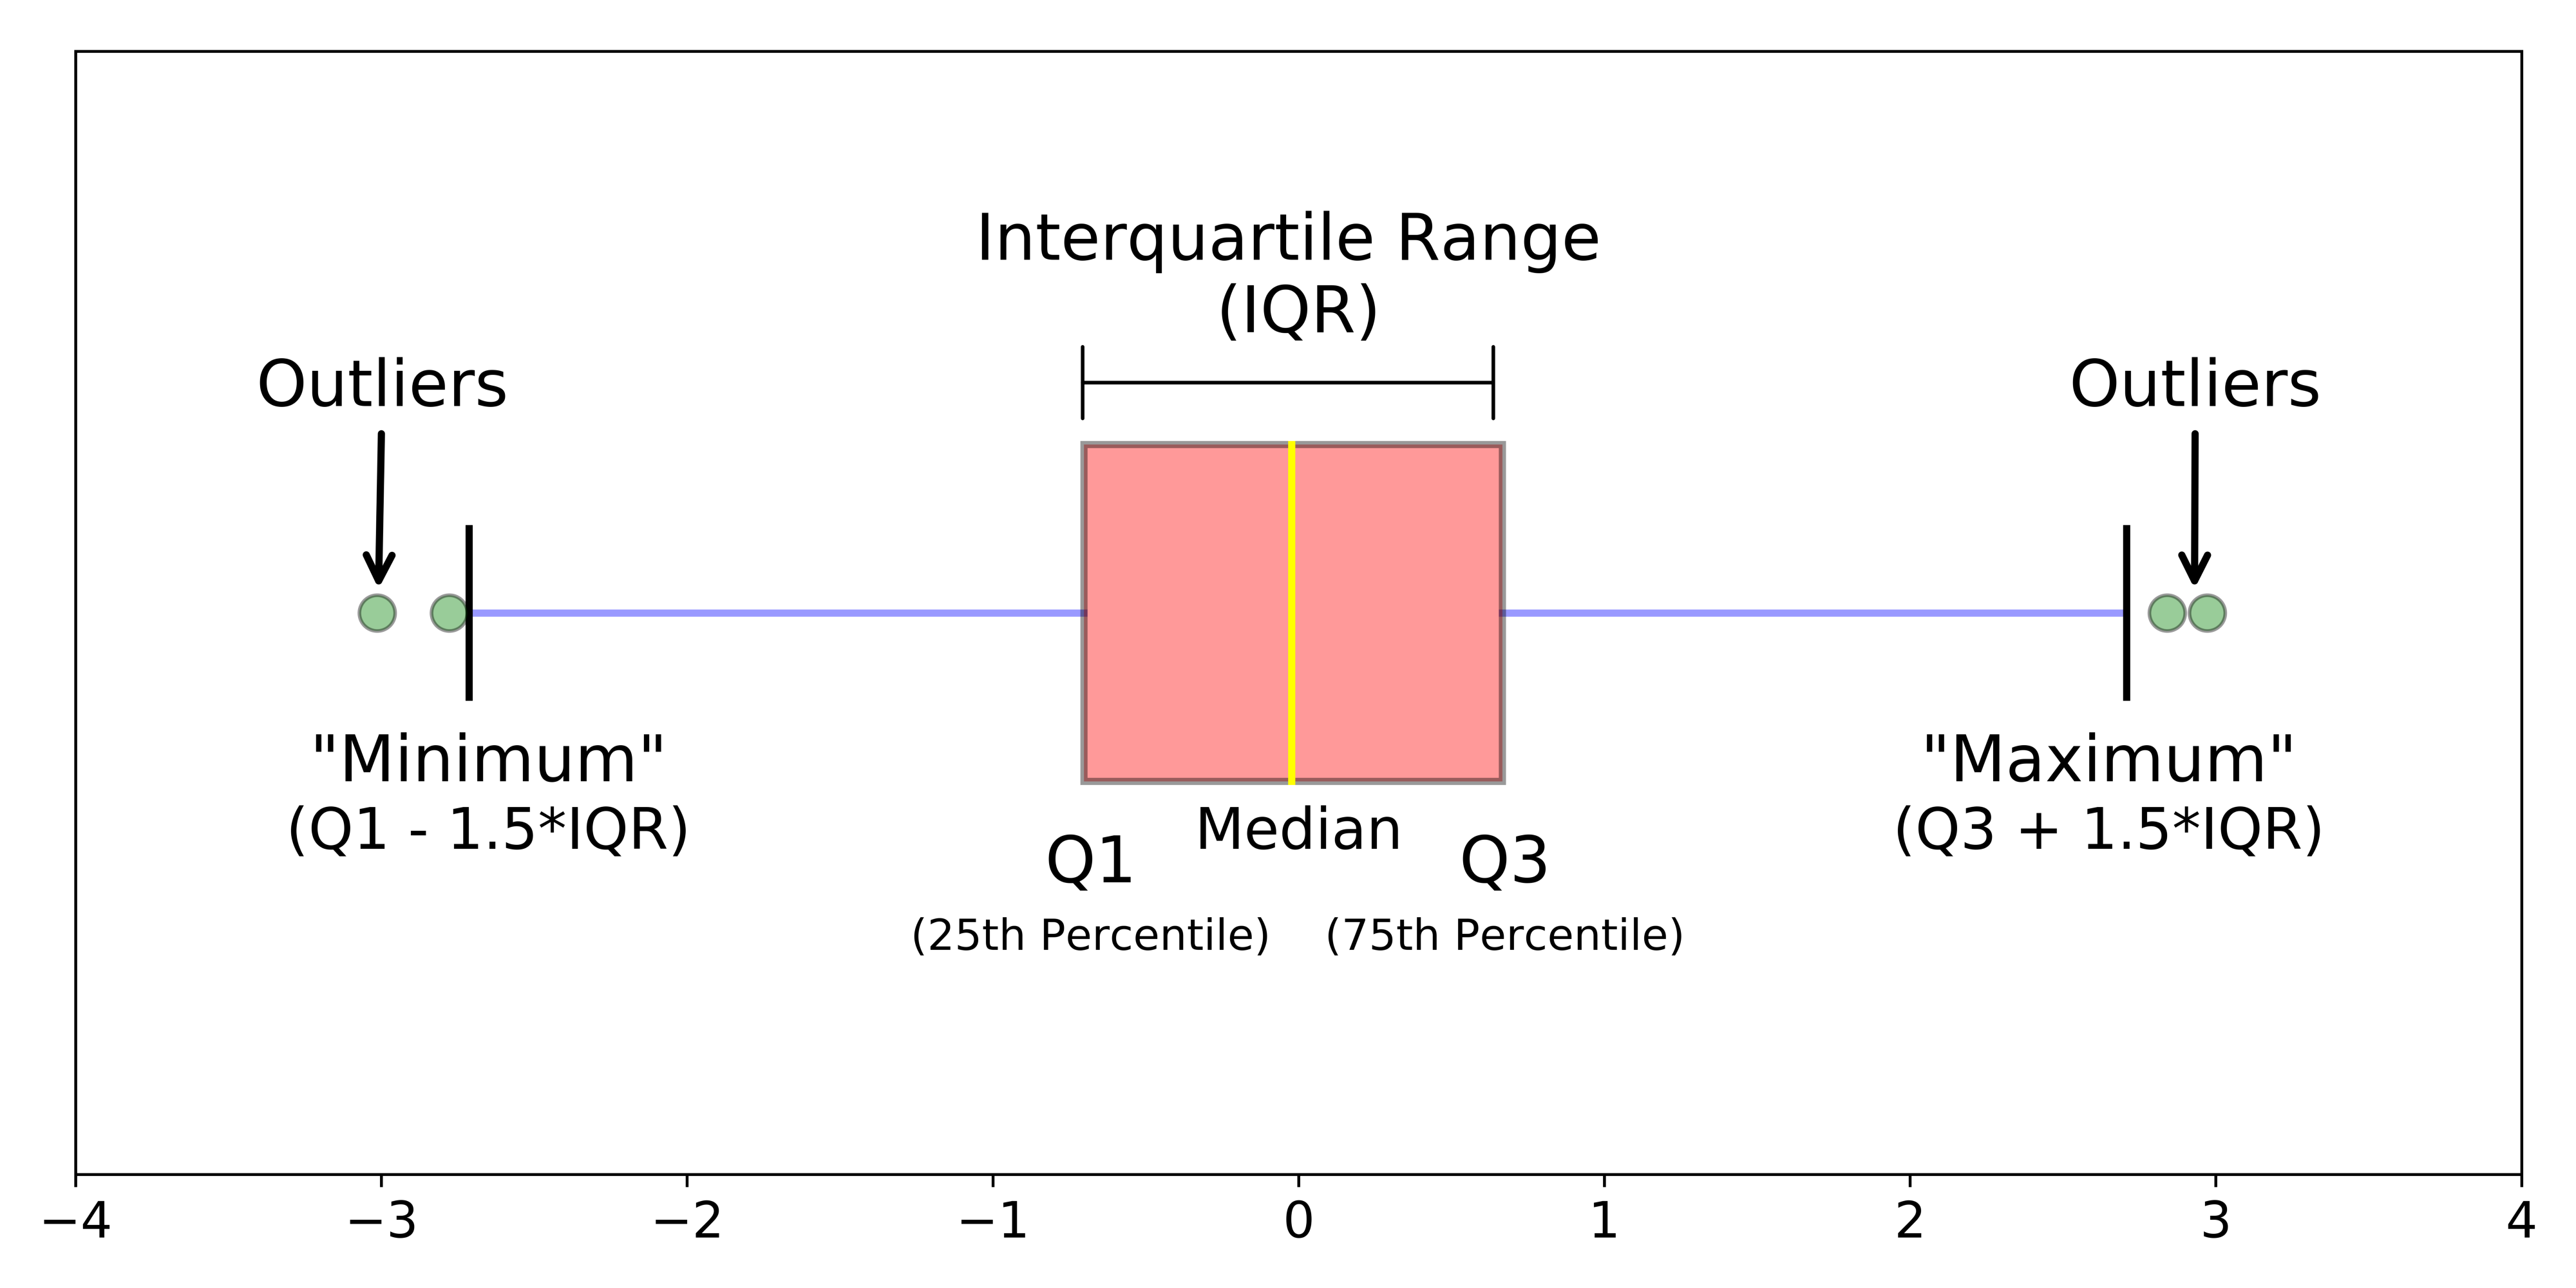

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

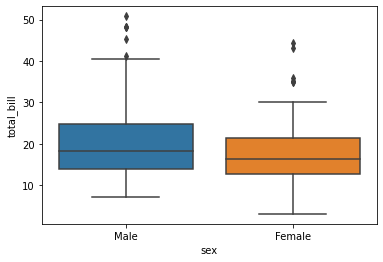

In [20]:
# Box Plot
sns.boxplot(data=tips,x='sex',y='total_bill')

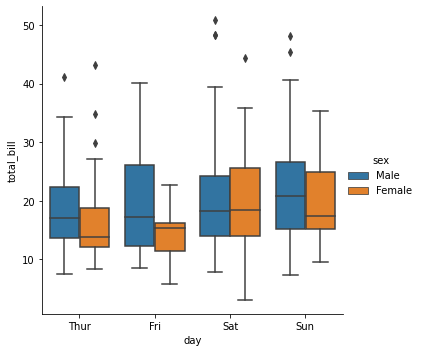

In [23]:
# Using catplot
# hue
sns.catplot(data=tips,x='day',y='total_bill',kind='box',hue='sex')

<AxesSubplot:xlabel='tip'>

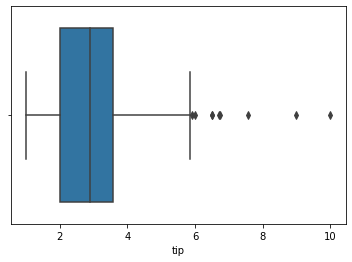

In [28]:
# single boxplot -> numerical col
sns.boxplot(data=tips,x='total_bill')

### Voilon plot = (Boxplot + KDEplot)

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

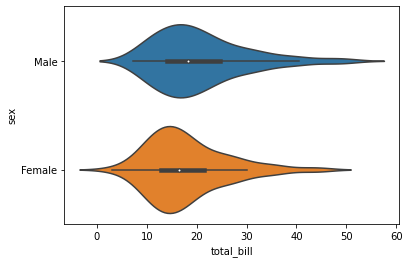

In [31]:
# violin plot
sns.violinplot(data=tips, x='total_bill',y='sex')

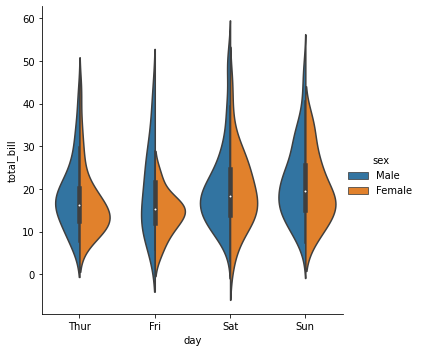

In [38]:
# split -> only works if the hue value has exactly 2 categories
sns.catplot(data=tips, y='total_bill',x='day',kind='violin',hue='sex',split=True)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

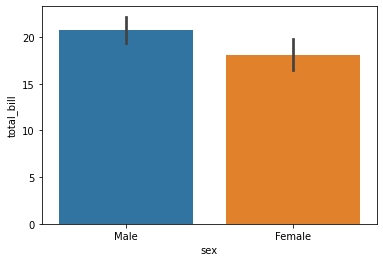

In [65]:
# barplot
sns.barplot(data=tips, x='sex', y='total_bill')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

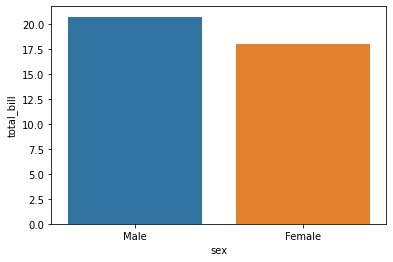

In [79]:
# to remove error bars
sns.barplot(data=tips, x='sex', y='total_bill',ci=None)

errorbar -> When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars

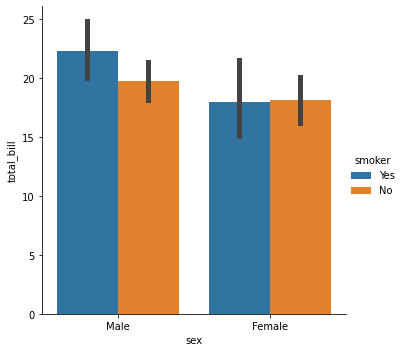

In [82]:
# if errorwidth == 0 you can remove the errorbars
sns.catplot(data=tips, x='sex', y='total_bill', errwidth=5, hue='smoker',kind='bar',estimator=np.mean)

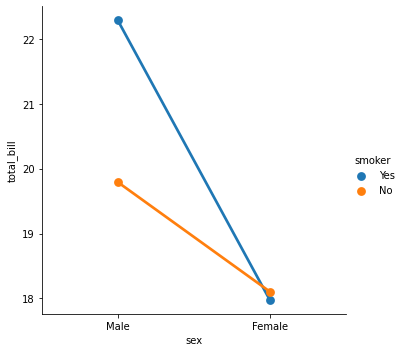

In [83]:
# pointplot
# it is connecting the errorbar if you look closely
sns.catplot(data=tips, x='sex', y='total_bill', hue='smoker', kind='point',estimator=np.mean, ci=None)

<AxesSubplot:xlabel='sex', ylabel='count'>

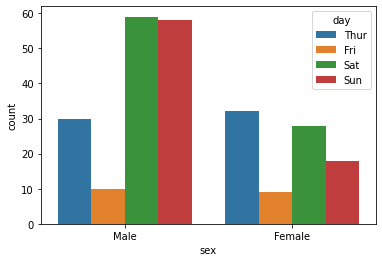

In [73]:
# countplot
sns.countplot(data=tips,x='sex',hue='day')

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable

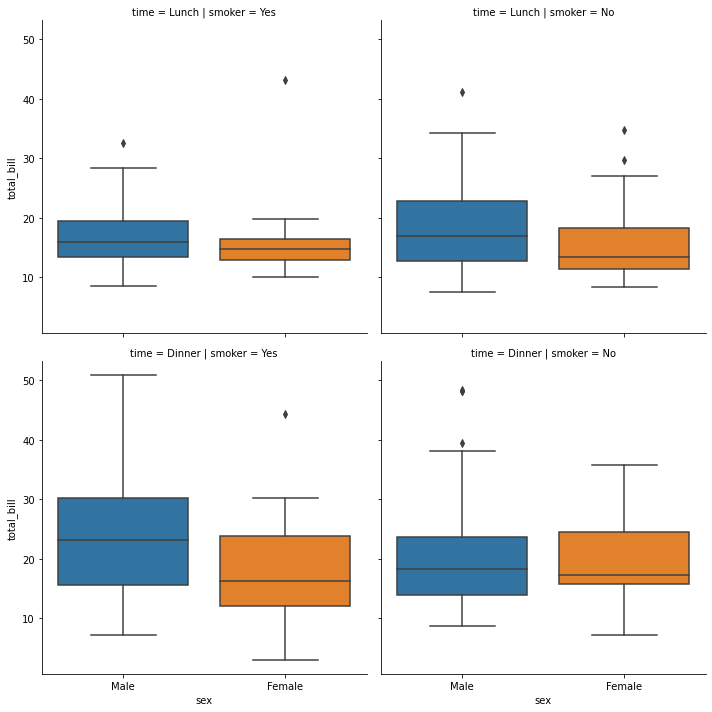

In [76]:
# faceting using catplot
sns.catplot(data=tips,x='sex',y='total_bill',kind='box',col='smoker',row='time')

## Regression Plots
- regplot
- lmplot

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

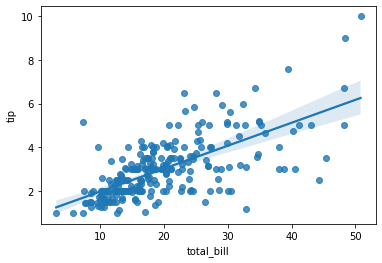

In [85]:
# axis level
sns.regplot(data=tips,x='total_bill',y='tip')

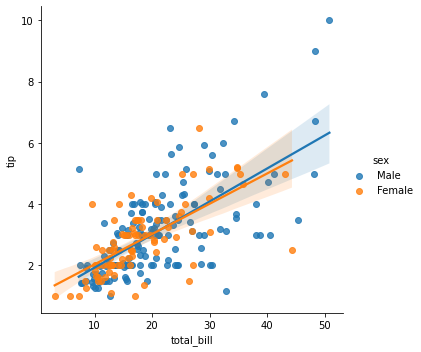

In [87]:
# figure level
# hue is exclusive to lmplot
sns.lmplot(data=tips,x='total_bill',y='tip', hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

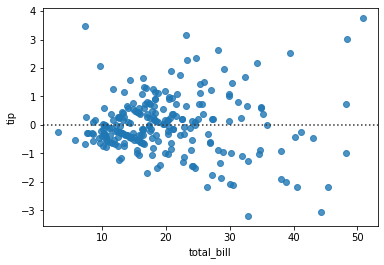

In [88]:
sns.residplot(data=tips,x='total_bill',y='tip')

### A Second way to plot Facet plot -> FacetGrid

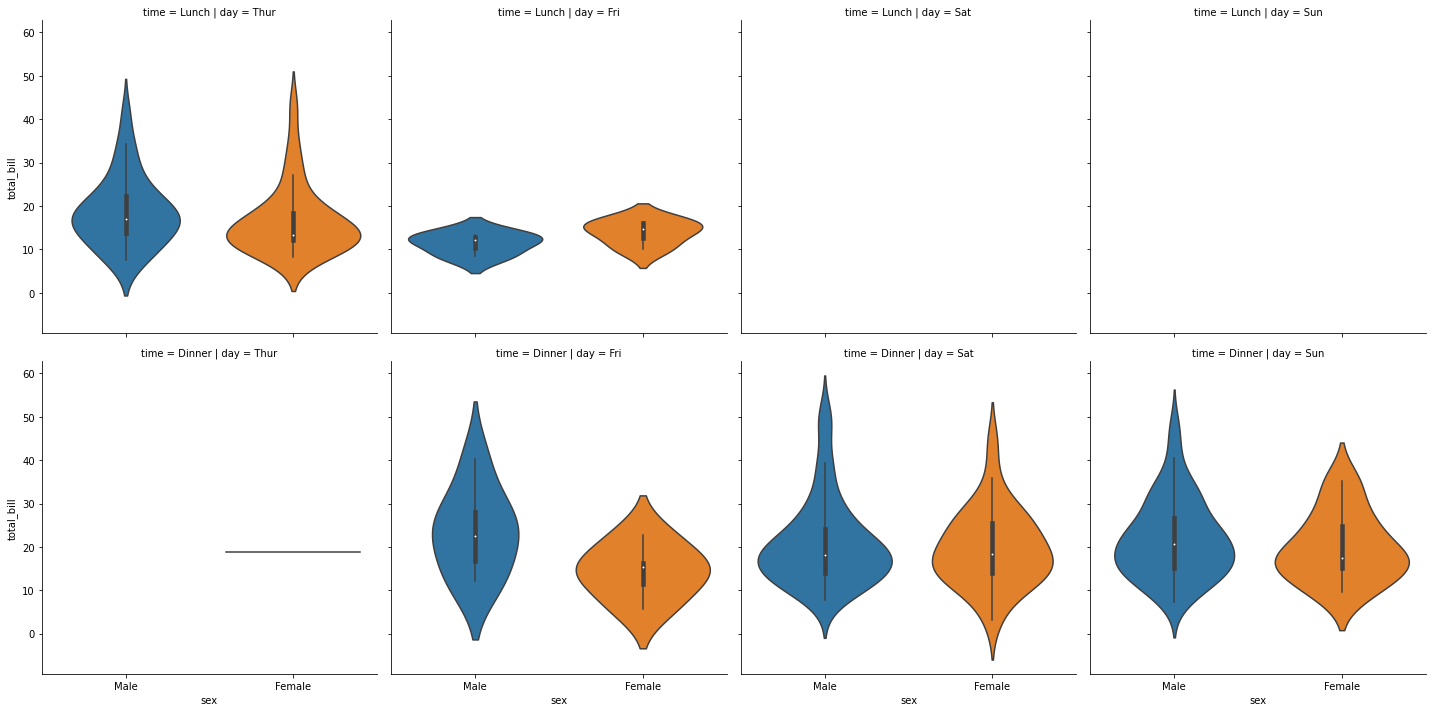

In [91]:
# figure level -> relplot, lmplot, displot, catplot
sns.catplot(data=tips,x='sex',y='total_bill',kind='violin',col='day',row='time')

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


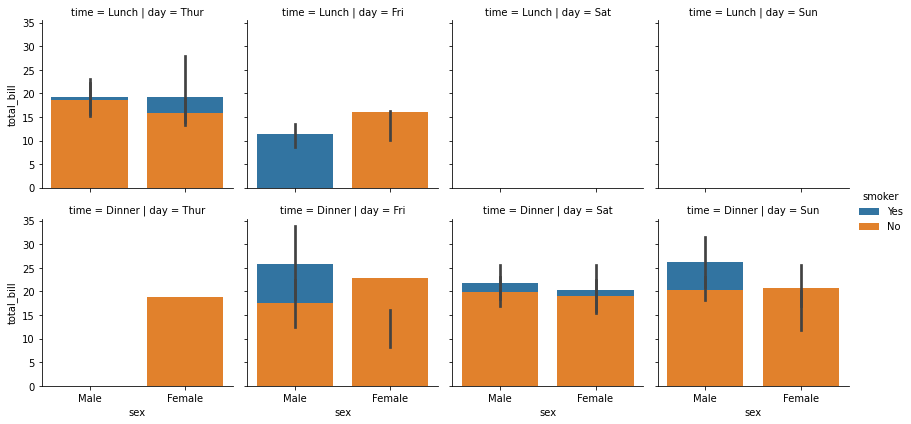

In [104]:
g = sns.FacetGrid(data=tips,col='day',row='time',hue='smoker')
g.map(sns.barplot,'sex','total_bill')
g.add_legend()

### Plotting Pairwise Relationship (PairGrid Vs Pairplot)

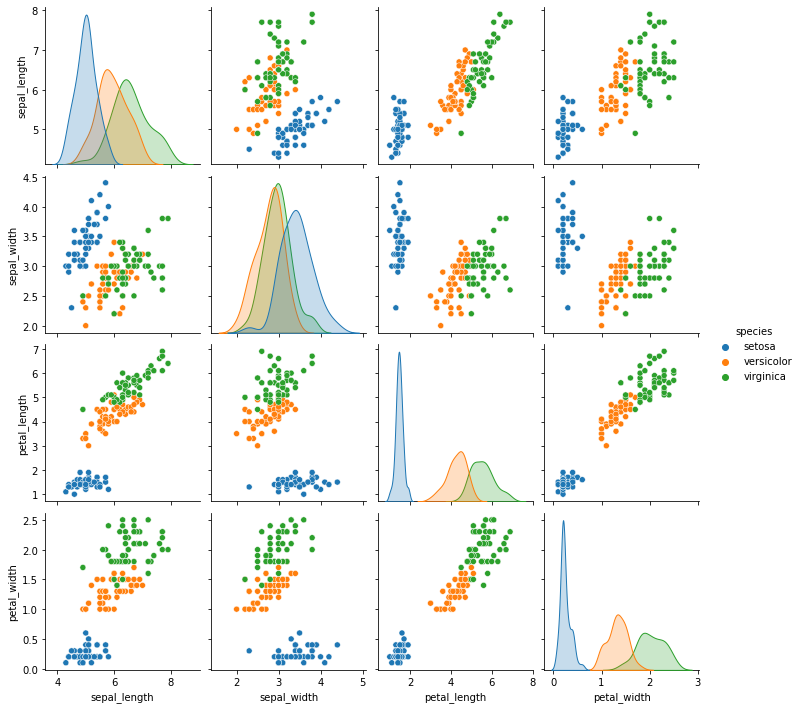

In [110]:
sns.pairplot(iris,hue='species')

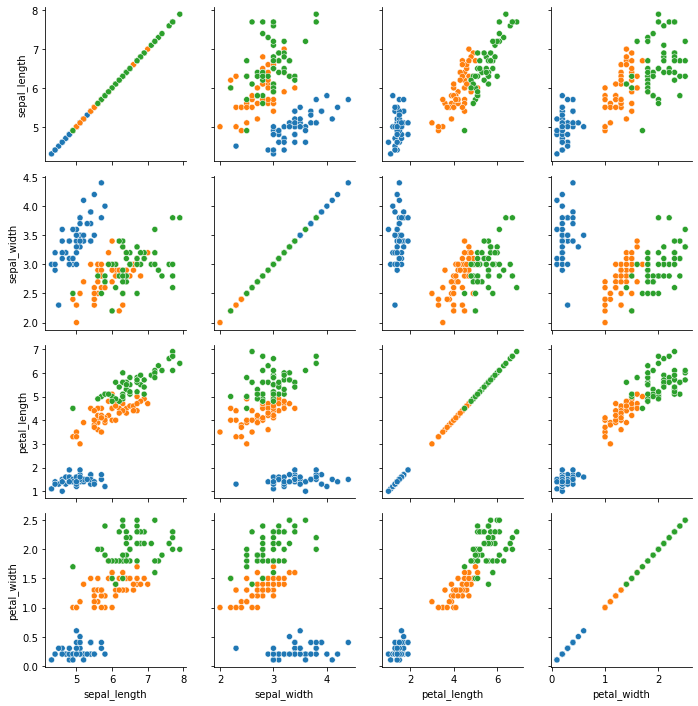

In [113]:
# pair grid
g = sns.PairGrid(data=iris, hue='species')
# g.map
g.map(sns.scatterplot)

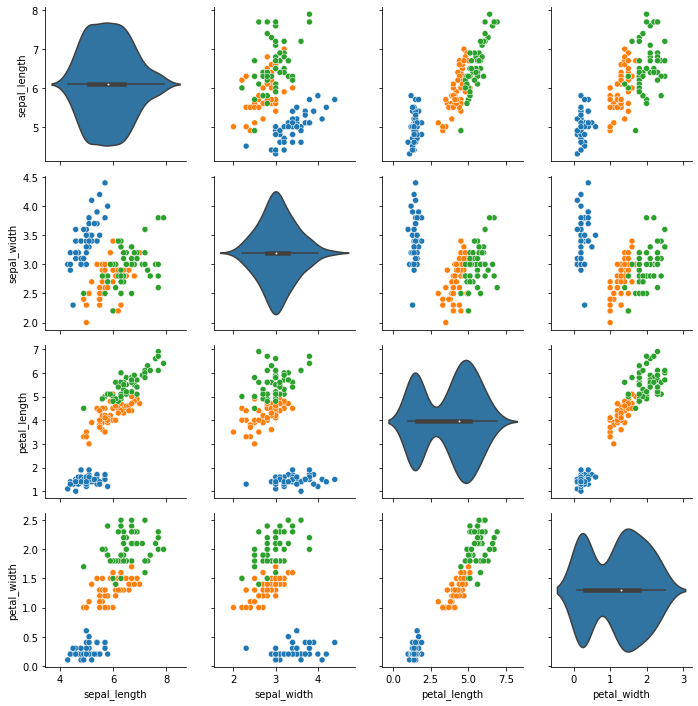

In [116]:
# map_diag -> map_offdiag
# you have the freedom to plot any graphs of choice
g = sns.PairGrid(data=iris, hue='species')
g.map_diag(sns.violinplot)
g.map_offdiag(sns.scatterplot)

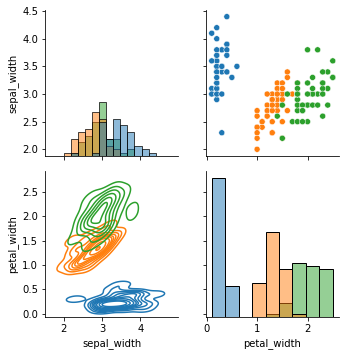

In [118]:
# map_diag -> map_upper -> map_lower
# vars -> your choice of columns to be plotted
g = sns.PairGrid(data=iris, hue='species', vars=['sepal_width','petal_width'])
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)

## JointGrid Vs Jointplot

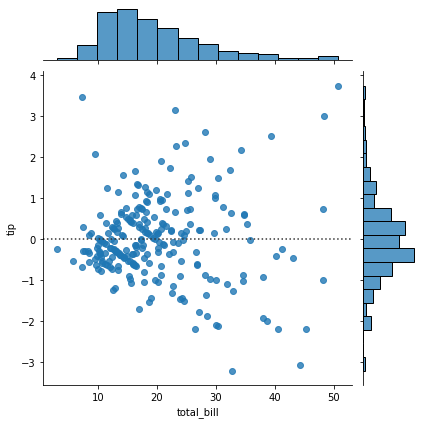

In [126]:
# jointplot
# if you give wrong value in the kind it'll give you the list of graph available in the error
sns.jointplot(data=tips,x='total_bill',y='tip', kind='resid')

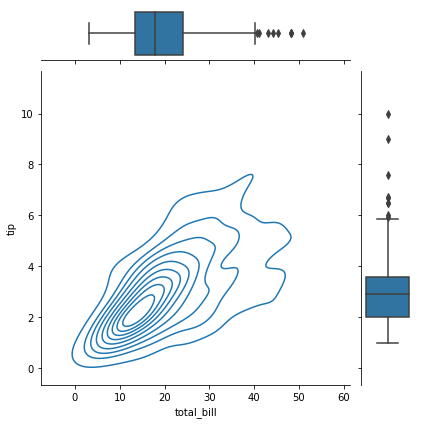

In [133]:
g = sns.JointGrid(data=tips,x='total_bill',y='tip')
g.plot(sns.kdeplot,sns.boxplot)

# Utility Functions

In [135]:
# get all dataset in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [136]:
# load dataset
sns.load_dataset('planets')

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008
